In [431]:
train_data_path = f'../data/JA_Dataset_240229.csv'

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # version 0.8.0以上

In [433]:
df = pd.read_csv(train_data_path)

In [434]:
df

,date,Week Start,Week End,Week Number,Shipment,Week Shipment,Teisyoku,Week Teisyoku,Temp,Week Temp,...,WNDDIR,Week WNDDIR,WNDSPD,Week WNDSPD,RHUM,Week RHUM,Rain,Week Rain,Status,Week Status
0,2017/12/31 0:00,2017/12/31 0:00,2018/1/6 0:00,23,2131.999998,7277.999998,0,0,6.4,34.6,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.5,1,3
1,2018/1/1 0:00,2017/12/31 0:00,2018/1/6 0:00,23,0.000000,7277.999998,0,0,6.8,34.6,...,161.085106,1147.126773,0.627660,6.92141,74.872340,384.434840,0.0,0.5,0,3
2,2018/1/2 0:00,2017/12/31 0:00,2018/1/6 0:00,23,0.000000,7277.999998,0,0,5.4,34.6,...,254.437500,1147.126773,1.552083,6.92141,63.583333,384.434840,0.0,0.5,0,3
3,2018/1/3 0:00,2017/12/31 0:00,2018/1/6 0:00,23,0.000000,7277.999998,0,0,6.3,34.6,...,197.770833,1147.126773,2.422917,6.92141,40.604167,384.434840,0.0,0.5,0,3
4,2018/1/4 0:00,2017/12/31 0:00,2018/1/6 0:00,23,2656.000000,7277.999998,0,0,2.9,34.6,...,159.333333,1147.126773,0.727083,6.92141,56.270833,384.434840,0.0,0.5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,2023/11/21 0:00,2023/11/19 0:00,2023/11/25 0:00,17,1055.000000,6745.000000,0,0,11.8,96.3,...,195.562500,1464.000000,0.791667,12.82500,77.875000,480.979167,0.0,1.0,1,5
2152,2023/11/22 0:00,2023/11/19 0:00,2023/11/25 0:00,17,0.000000,6745.000000,0,0,14.5,96.3,...,200.458333,1464.000000,1.185417,12.82500,81.604167,480.979167,0.0,1.0,0,5
2153,2023/11/23 0:00,2023/11/19 0:00,2023/11/25 0:00,17,1967.000000,6745.000000,0,0,16.5,96.3,...,231.895833,1464.000000,1.900000,12.82500,78.166667,480.979167,1.0,1.0,1,5
2154,2023/11/24 0:00,2023/11/19 0:00,2023/11/25 0:00,17,1682.000000,6745.000000,0,0,17.8,96.3,...,237.250000,1464.000000,5.079167,12.82500,54.625000,480.979167,0.0,1.0,1,5


<Axes: xlabel='date'>

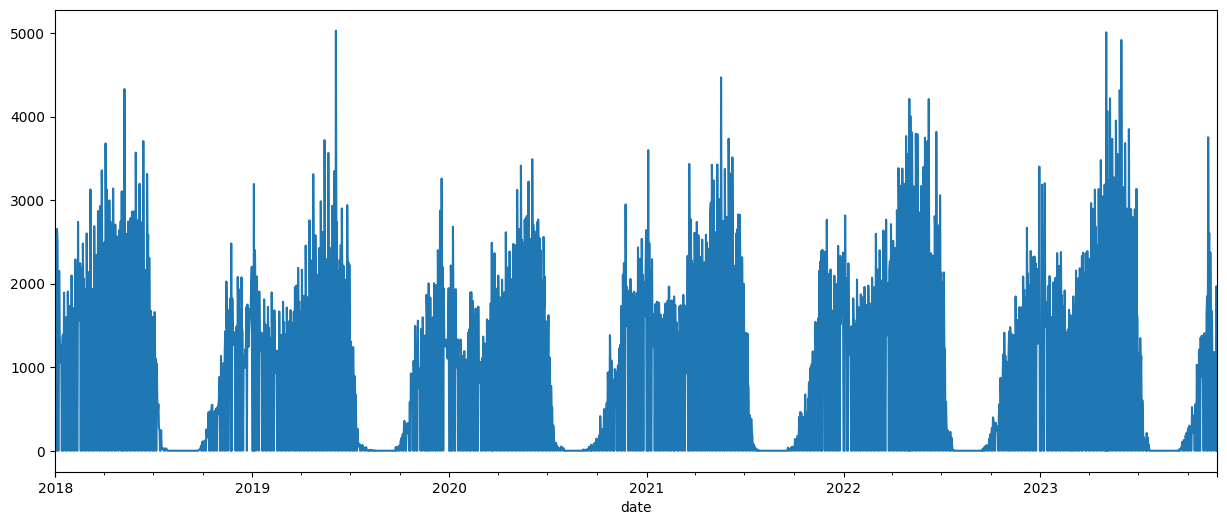

In [435]:
# Pandas.Seriesにデータを格納（データに乗客数、インデックスは日付）
shipment_day = pd.Series(df['Shipment'], dtype='float') # ①
shipment_day.index = pd.to_datetime(df['date']) # ②

plt.figure(figsize=(15, 6))
shipment_day.plot()

dfを各年度ごとに分割
最初の年度は外れ値なので除去

In [436]:
import pandas as pd

# dfのデータが日付型であることを確認または変換
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year

# 各年で初めてWeek Numberが1になるインデックスを安全に見つける
def find_first_week_one(x):
    week_one_indices = x[x['Week Number'] == 1].index
    if len(week_one_indices) > 0:
        return week_one_indices[0]
    return None

year_indices = df.groupby('Year').apply(find_first_week_one).dropna().tolist()

for i in range(len(year_indices)):
    year_indices[i] = int(year_indices[i])

# データフレームを分割
segments = []
for i in range(len(year_indices) - 1):
    segments.append(df.iloc[year_indices[i]:year_indices[i + 1]])

# 最後のセグメントを追加
if year_indices:
    segments.append(df.iloc[year_indices[-1]:])



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


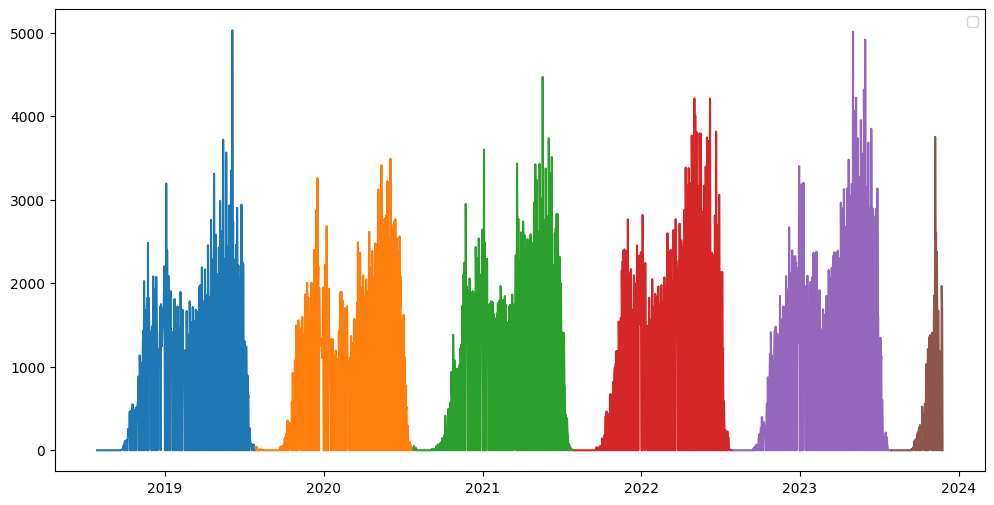

In [437]:
#各年度ごとのshipmentを表示
plt.figure(figsize=(12, 6))
for i in range(len(segments)):
    plt.plot(segments[i]["date"], segments[i]["Shipment"])
    plt.legend()
    plt.show

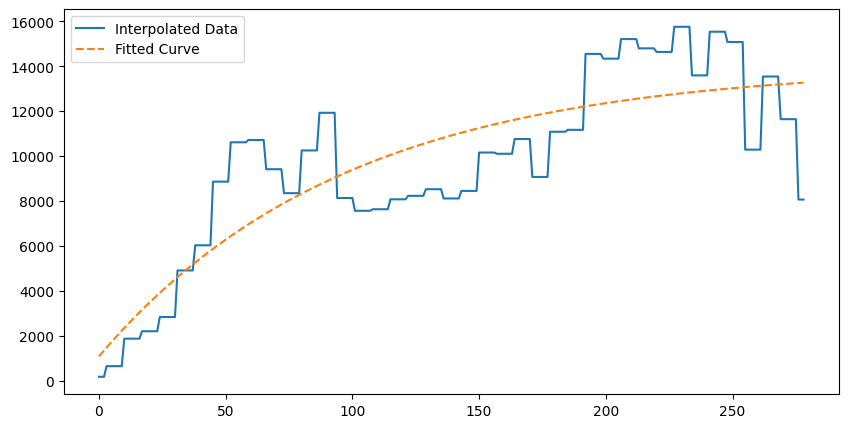

In [438]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# フィッティング関数の定義
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# セグメントのデータを取得（仮のデータで示す）
data = pd.Series(segments[3]["Week Shipment"][60:][:-25].copy())

# 0の値をNaNに置き換える
data.replace(0, np.nan, inplace=True)

# 移動平均でNaNを埋める
data.fillna(data.rolling(window=1, min_periods=1, center=True).mean(), inplace=True)

# 残ったNaNを線形補間で埋める
data.interpolate(method='linear', inplace=True)

# まだ残っているNaNがある場合、平均値で埋める
data.fillna(data.mean(), inplace=True)

# xsをセグメントの長さに基づく整数の配列に置き換え
xs = np.arange(len(data))

# ysは補間後のデータ
ys = data.values

# 初期パラメータの設定
initial_parameters = [max(ys), 0.1, min(ys)]

# カーブフィッティングを実行（maxfevと初期パラメータを設定）
popt, pcov = curve_fit(func, xs, ys, p0=initial_parameters, maxfev=5000)

# フィットしたパラメータから曲線を計算
a1, b1, c1 = popt
y_reg = func(xs, *popt)

# 元のデータとフィットした曲線をプロット
plt.figure(figsize=(10, 5))
plt.plot(xs, data, label='Interpolated Data')
plt.plot(xs, y_reg, label='Fitted Curve', linestyle='--')
plt.legend()
plt.show()


<Axes: >

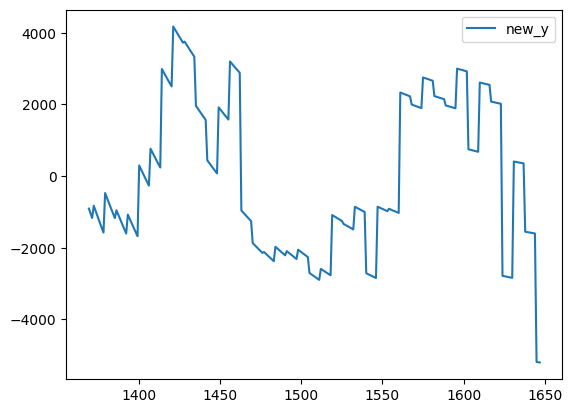

In [439]:
new_y = data - y_reg
new_y = pd.DataFrame({'new_y': new_y})

new_y.plot()


箱: 第一四分位数（Q1、箱の下端）から第三四分位数（Q3、箱の上端）までの範囲を示します。この範囲を「四分位範囲（IQR）」と呼びます。
中央値: 箱の中央に引かれた線で、データの中央値（中点）を示します。
ヒゲ: 箱の上下に延びる線で、通常は「Q1 - 1.5 * IQR」から「Q3 + 1.5 * IQR」までの範囲に描かれます。これを超えるデータポイントは外れ値とみなされます。
外れ値: 上記のヒゲからはみ出たデータポイントは、通常小さな円または点で表示され、これが外れ値です。

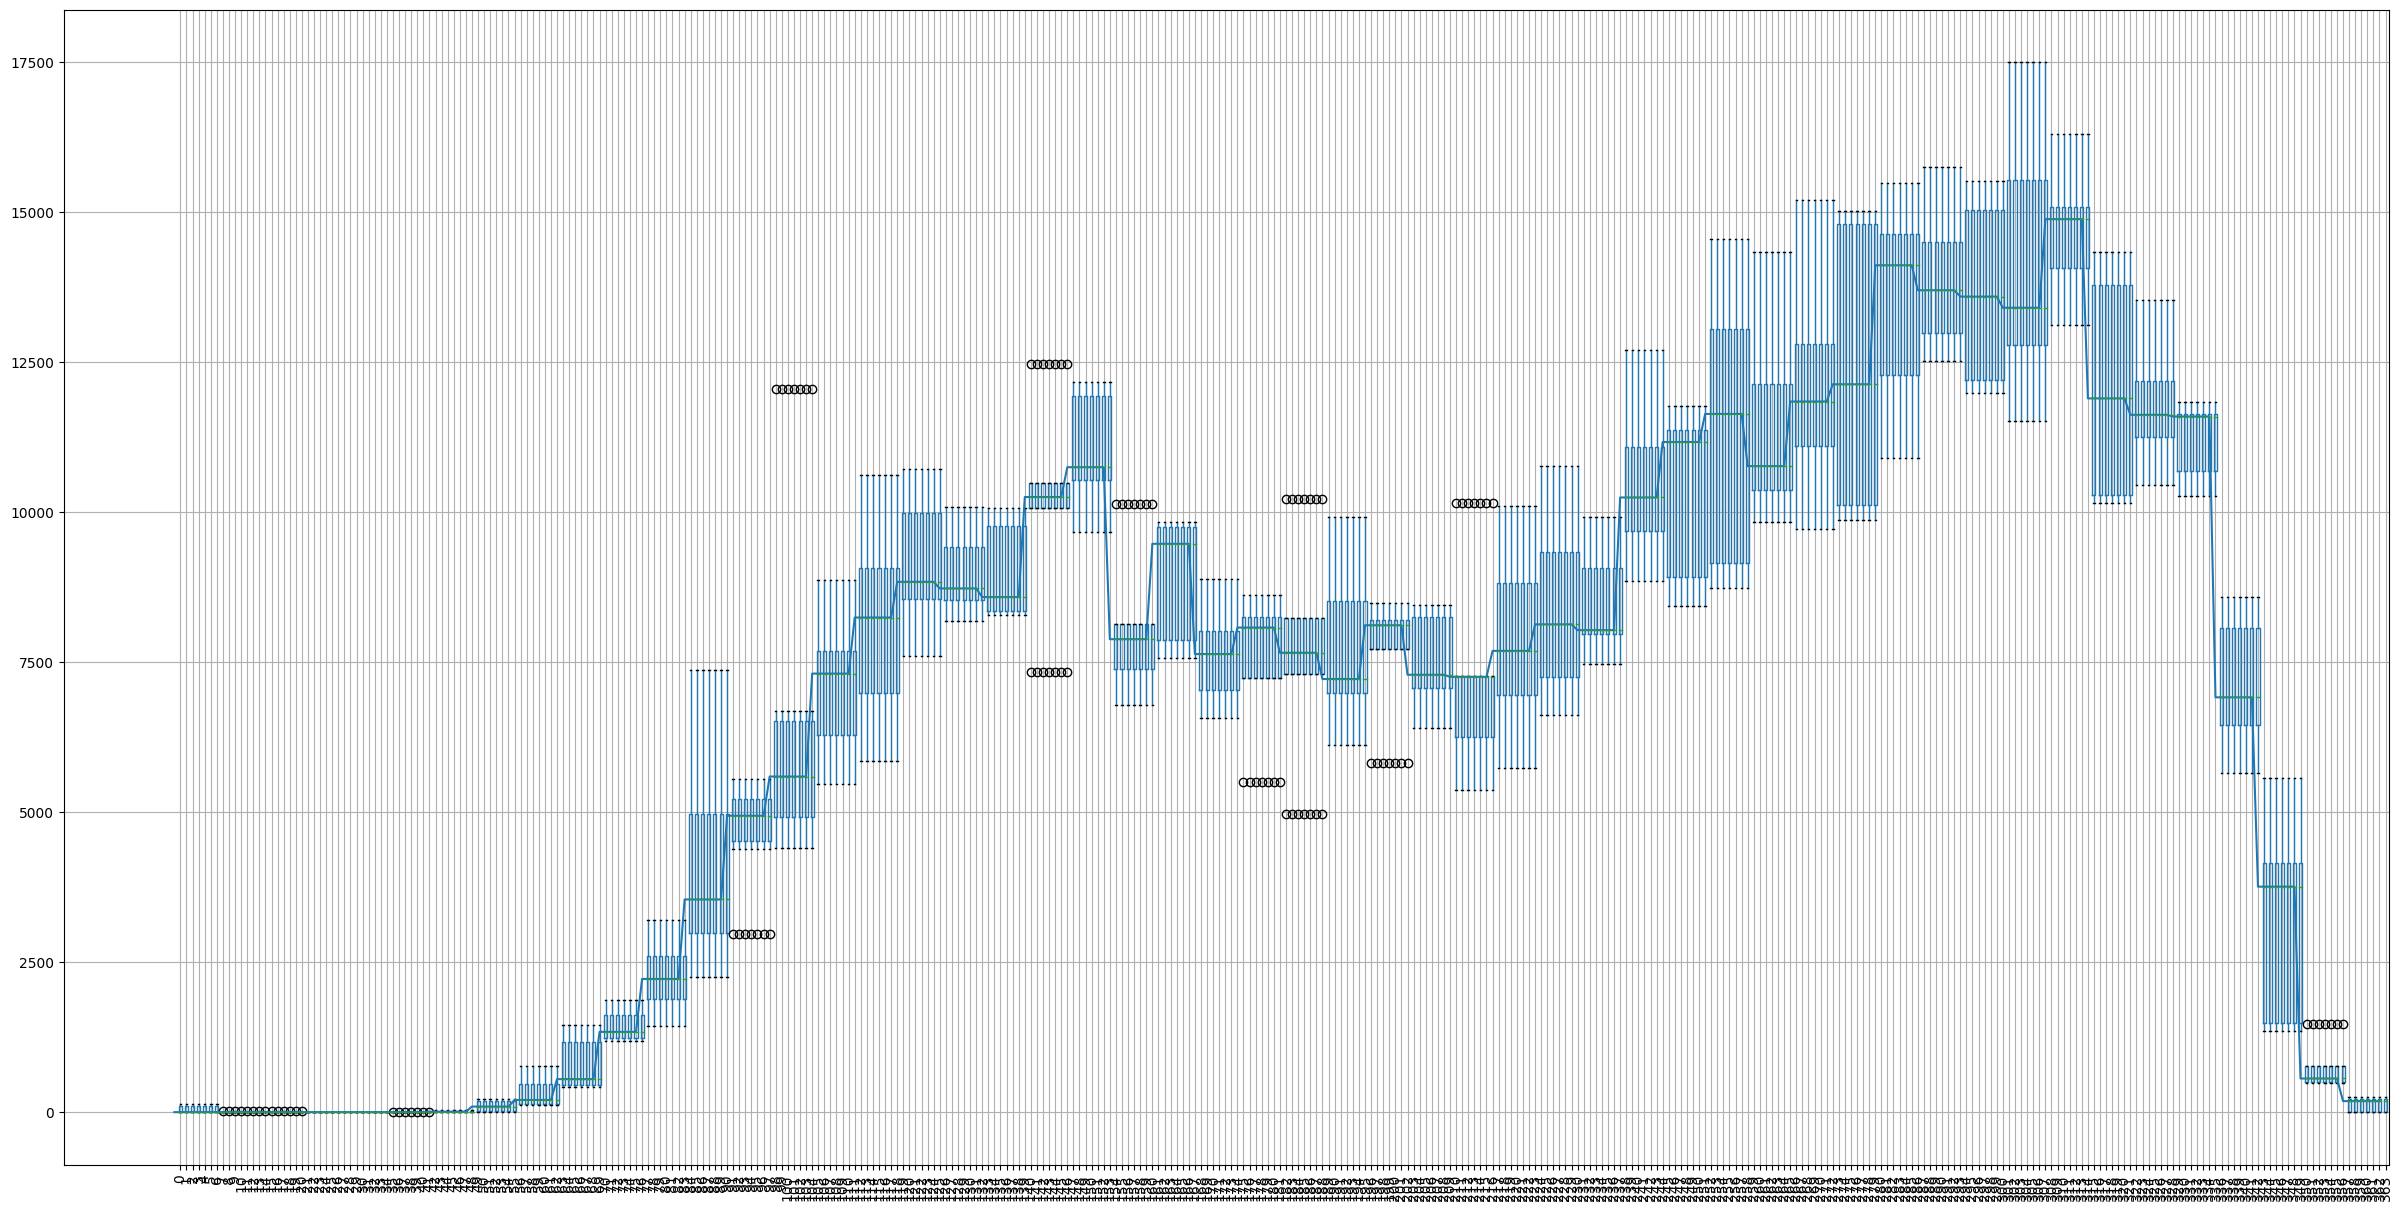

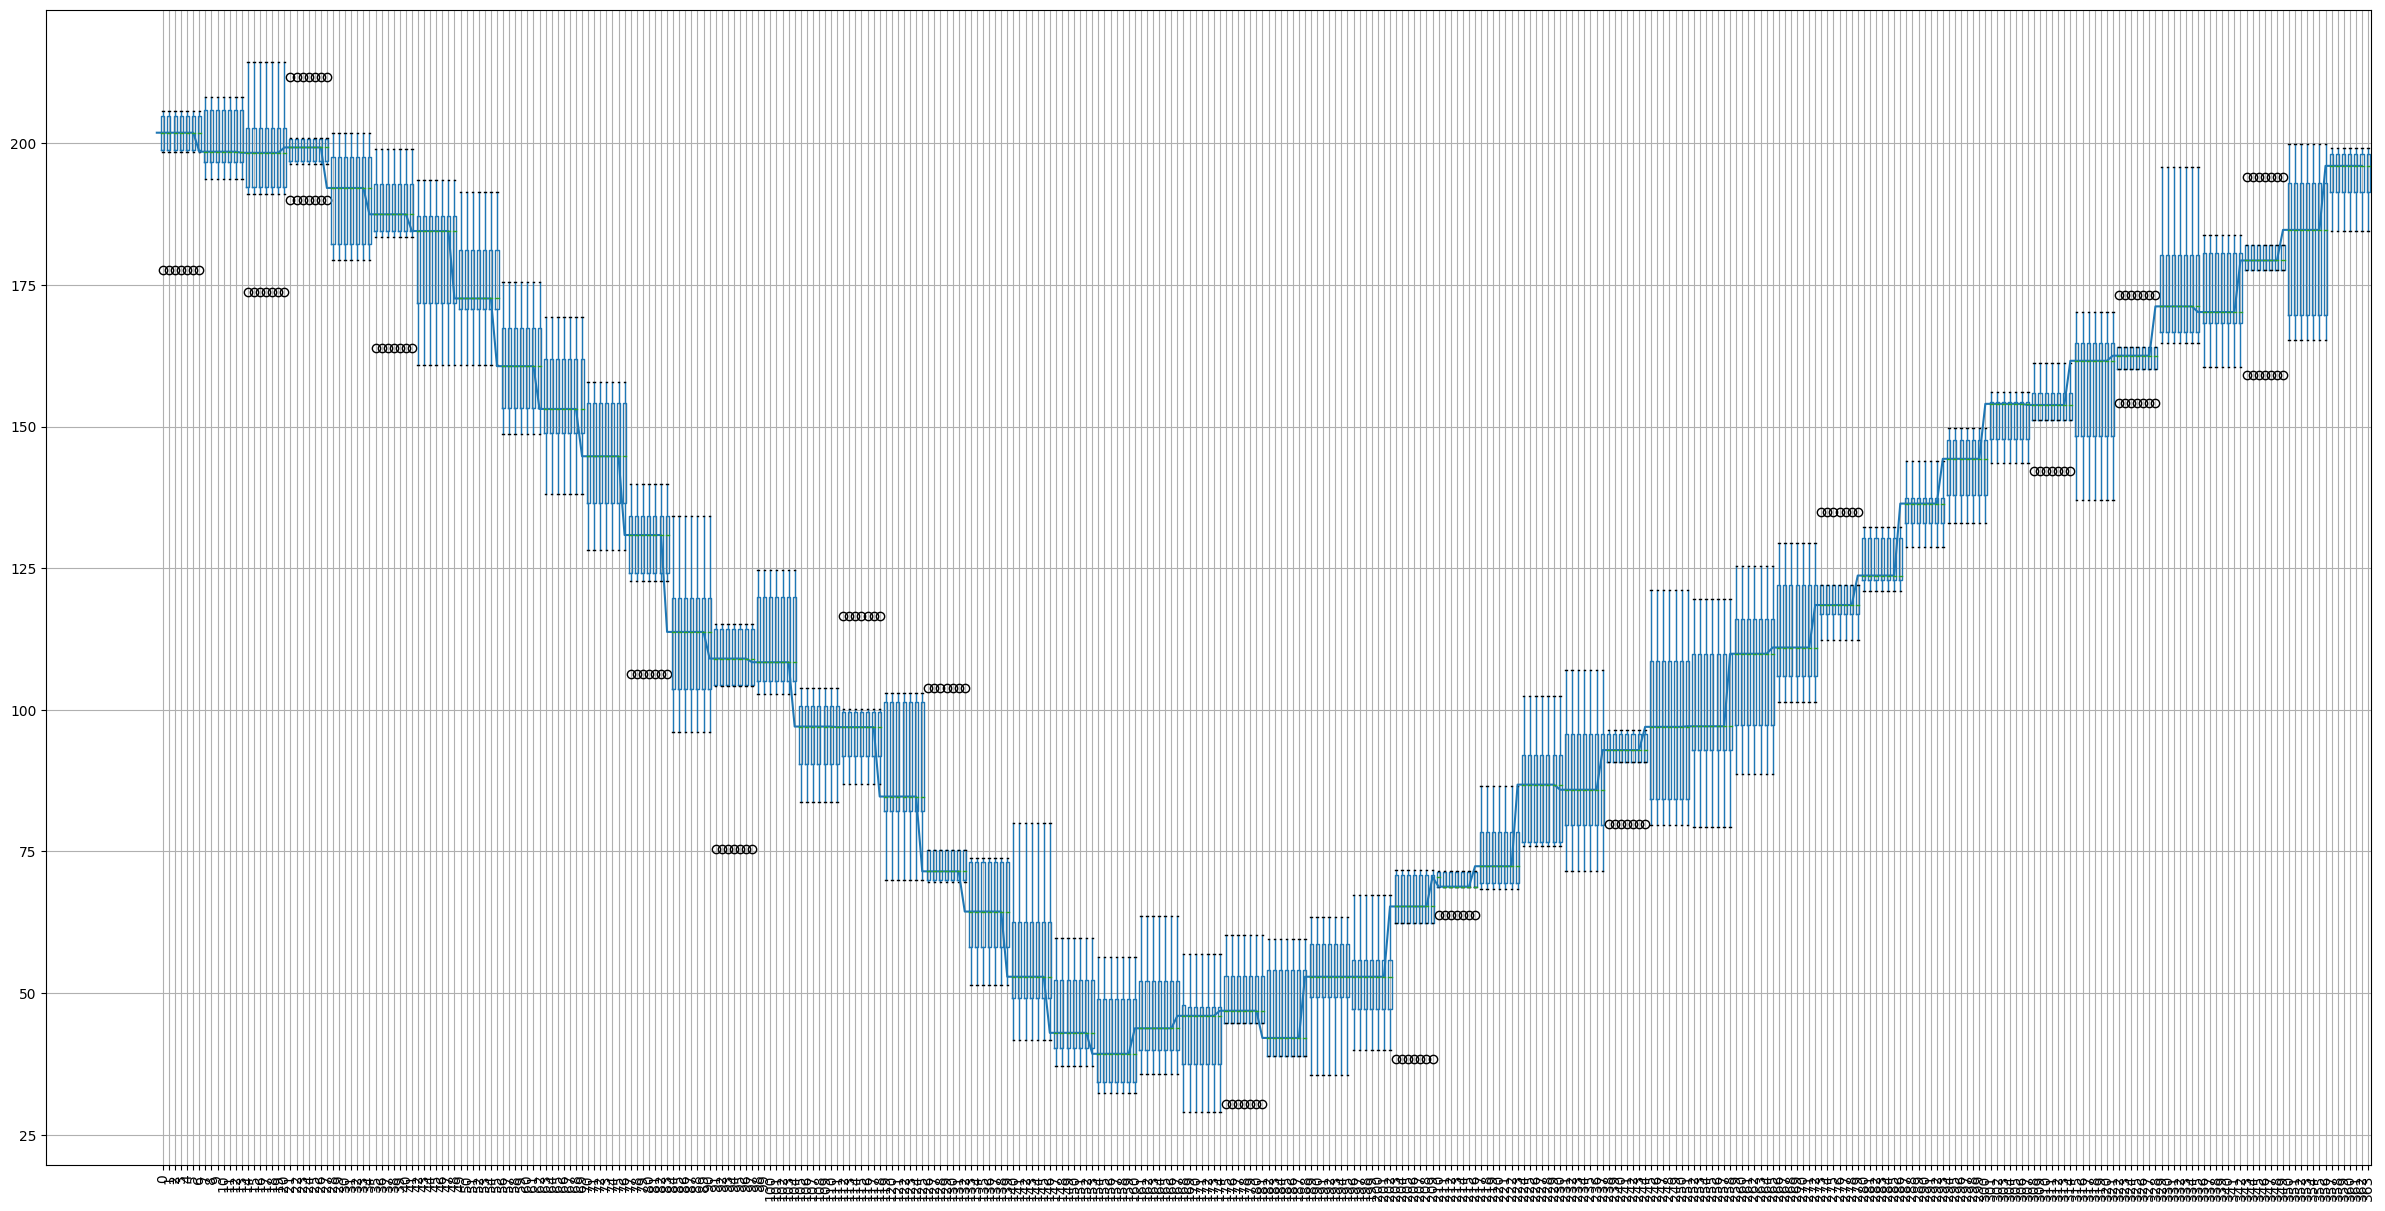

In [440]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 仮のデータセット生成
df_WeekShipment = pd.DataFrame()
df_WeekTemp = pd.DataFrame()
for i in range(len(segments)):
    data_name = "Data set" + str(i+2018)
    df_WeekShipment[data_name] = segments[i]["Week Shipment"].reset_index(drop=True)
    df_WeekTemp[data_name] = segments[i]["Week Temp"].reset_index(drop=True)

# DataFrameを転置して、各時点でのデータを集める
df_WeekShipment_transposed = df_WeekShipment.T
df_WeekTemp_transposed = df_WeekTemp.T
# 箱ひげ図をプロット
plt.figure(figsize=(30, 15))  # グラフのサイズを調整
df_WeekShipment_transposed.boxplot()
plt.xticks(rotation=90)  # x軸のラベルを回転して表示
medians_week_shipment= df_WeekShipment_transposed.median()
df_WeekShipment["median"] = medians_week_shipment
plt.plot(df_WeekShipment["median"])
plt.grid(True)
plt.show()

# 箱ひげ図をプロット
plt.figure(figsize=(30, 15))  # グラフのサイズを調整
df_WeekTemp_transposed.boxplot()
plt.xticks(rotation=90)  # x軸のラベルを回転して表示
medians_week_temp = df_WeekTemp_transposed.median()
df_WeekTemp["median"] = medians_week_temp
plt.plot(df_WeekTemp["median"])
plt.grid(True)
plt.show()


In [441]:
# Concatenate the DataFrame four times along the columns
concatenated_weektemp_df = pd.concat([df_WeekTemp_transposed] * 6, axis=1)
concatenated_weekshipment_df = pd.concat([df_WeekShipment_transposed] * 6, axis=1)

In [442]:
def plot_box_and_line(ax, df_boxplot, segments, column_name='Week Shipment'):
    concatenated_dates = pd.concat([seg["date"] for seg in segments])

    # Plot the boxplot on the provided Axes object and store the returned elements
    boxplot = df_boxplot.boxplot(ax=ax, return_type='dict')

    # Plot each segment's data on the same Axes
    for idx, seg in enumerate(segments):
        date_positions = [concatenated_dates.reset_index(drop=True)[concatenated_dates.reset_index(drop=True) == date].index[0] + 1 for date in seg["date"]]
        ax.plot(date_positions, seg[column_name], 'o-', color="Red", linewidth=2, markersize=10, label=f'Segment {idx}')

    ax.set_title('Comparison of Boxplot and Line Plots for Each Segment')
    ax.set_ylabel('Shipment Values')
    ax.set_xlabel('Date Indexes')

    tick_positions = range(1, len(concatenated_dates) + 1)
    tick_labels = [date.strftime('%Y-%m-%d') if i % 5 == 0 else '' for i, date in enumerate(concatenated_dates)]
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, rotation=90)

    ax.grid(True)
    ax.legend()

    # Extract ymin and ymax from the caps of the boxplot
    ymin = min([item.get_ydata()[0] for item in boxplot['caps']])
    ymax = max([item.get_ydata()[0] for item in boxplot['caps']])
    ax.set_ylim([ymin, ymax])

# Using the corrected function in subplots
fig, axs = plt.subplots(2, 1, figsize=(100, 60))

plot_box_and_line(axs[0], concatenated_weektemp_df, segments, column_name='Week Temp')
plot_box_and_line(axs[1], concatenated_weekshipment_df, segments)

plt.tight_layout()
plt.show()


In [448]:
# df_WeekShipment["median"] の値を NumPy 配列として取得
week_shipment_median_values = df_WeekShipment["median"].values

# segments の各要素に対して処理
for i in range(len(segments)):
    # segments[i] の "Week Shipment" データを NumPy 配列として取得
    segment_week_shipment_values = segments[i]["Week Shipment"].values
    
    # サイズを比較して短い方に合わせる
    min_length = min(len(segment_week_shipment_values), len(week_shipment_median_values))
    
    # 両配列を最小の長さに切り詰めてから計算
    diff_median_values = segment_week_shipment_values[:min_length] - week_shipment_median_values[:min_length]
    
    # 結果を DataFrame に戻す
    segments[i].loc[:, "diff_median"] = pd.Series(diff_median_values, index=segments[i].index[:min_length])

    # 処理の進行状況を確認
    print(f"Segment {i} processed with {min_length} entries.")

# すべての segments を縦に連結
all_segments_concatenated = pd.concat(segments, ignore_index=True)

# 結果を CSV ファイルに保存
csv_file_path = "../data/output.csv"  # 保存するファイルのパスを指定してください
all_segments_concatenated.to_csv(csv_file_path, index=False)

print(f"All data has been concatenated and saved to {csv_file_path}.")


Segment 0 processed with 364 entries.
Segment 1 processed with 364 entries.
Segment 2 processed with 364 entries.
Segment 3 processed with 364 entries.
Segment 4 processed with 364 entries.
Segment 5 processed with 119 entries.
All data has been concatenated and saved to ../data/output.csv.
